In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Gultac\Desktop\Desktop\clean_cafe_sales.csv",
    sep=";")

In [4]:
df

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
0,TXN_1961373,Coffee,2,20,40,Credit Card,Takeaway,08.09.2023
1,TXN_4977031,Cake,4,30,120,Cash,In-store,16.05.2023
2,TXN_3160411,Coffee,2,20,40,Digital Wallet,In-store,11.06.2023
3,TXN_2548360,Salad,5,50,250,Cash,Takeaway,07.11.2023
4,TXN_7619095,Sandwich,2,40,80,Cash,In-store,03.05.2023
...,...,...,...,...,...,...,...,...
2712,TXN_9668108,Cake,1,30,30,Cash,In-store,20.01.2023
2713,TXN_9933628,Smoothie,5,40,200,Cash,In-store,20.07.2023
2714,TXN_2858441,Sandwich,2,40,80,Credit Card,In-store,14.12.2023
2715,TXN_3897619,Sandwich,3,40,120,Cash,Takeaway,24.02.2023


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    2717 non-null   object
 1   item              2717 non-null   object
 2   quantity          2717 non-null   int64 
 3   price_per_unit    2717 non-null   int64 
 4   total_spent       2717 non-null   int64 
 5   payment_method    2717 non-null   object
 6   location          2717 non-null   object
 7   transaction_date  2717 non-null   object
dtypes: int64(3), object(5)
memory usage: 169.9+ KB


In [6]:
df.describe()

,quantity,price_per_unit,total_spent
count,2717.000000,2717.000000,2717.000000
mean,3.013986,31.531100,95.248436
std,1.420120,12.536113,61.557346
min,1.000000,10.000000,10.000000
25%,2.000000,20.000000,40.000000
50%,3.000000,30.000000,80.000000
75%,4.000000,40.000000,150.000000
max,5.000000,50.000000,250.000000


In [7]:
df['transaction_date'].dtype


dtype('O')

In [8]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], dayfirst=True)

In [9]:
df['transaction_date'].dtype

dtype('<M8[ns]')

In [10]:
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['month_name'] = df['transaction_date'].dt.month_name()

In [11]:
df

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date,year,month,month_name
0,TXN_1961373,Coffee,2,20,40,Credit Card,Takeaway,2023-09-08,2023,9,September
1,TXN_4977031,Cake,4,30,120,Cash,In-store,2023-05-16,2023,5,May
2,TXN_3160411,Coffee,2,20,40,Digital Wallet,In-store,2023-06-11,2023,6,June
3,TXN_2548360,Salad,5,50,250,Cash,Takeaway,2023-11-07,2023,11,November
4,TXN_7619095,Sandwich,2,40,80,Cash,In-store,2023-05-03,2023,5,May
...,...,...,...,...,...,...,...,...,...,...,...
2712,TXN_9668108,Cake,1,30,30,Cash,In-store,2023-01-20,2023,1,January
2713,TXN_9933628,Smoothie,5,40,200,Cash,In-store,2023-07-20,2023,7,July
2714,TXN_2858441,Sandwich,2,40,80,Credit Card,In-store,2023-12-14,2023,12,December
2715,TXN_3897619,Sandwich,3,40,120,Cash,Takeaway,2023-02-24,2023,2,February


In [12]:
df['total_spent'].sum()

np.int64(258790)

In [13]:
df.groupby('item')['quantity'].sum()

item
Cake        1173
Coffee      1121
Cookie      1163
Juice       1245
Salad       1272
Sandwich    1193
Smoothie    1022
Name: quantity, dtype: int64

In [14]:
df.groupby('item')['quantity'].sum().sort_values(ascending=False)

item
Salad       1272
Juice       1245
Sandwich    1193
Cake        1173
Cookie      1163
Coffee      1121
Smoothie    1022
Name: quantity, dtype: int64

In [15]:
monthly_sales = df.groupby(['year','month'])['total_spent'].sum()
monthly_sales

year  month
2023  1        26050
      2        20440
      3        20870
      4        21030
      5        17080
      6        21630
      7        21810
      8        21950
      9        22810
      10       21550
      11       22680
      12       20890
Name: total_spent, dtype: int64

In [16]:
df.groupby('item')['total_spent'].sum()

item
Cake        35190
Coffee      22420
Cookie      11630
Juice       37350
Salad       63600
Sandwich    47720
Smoothie    40880
Name: total_spent, dtype: int64

In [17]:
df['total_spent'].mean()

np.float64(95.24843577475157)

In [18]:
df.groupby('item')['total_spent'].mean().sort_values(ascending=False)

item
Salad       152.153110
Sandwich    122.046036
Smoothie    120.946746
Cake         91.402597
Juice        87.470726
Coffee       61.089918
Cookie       29.744246
Name: total_spent, dtype: float64

In [19]:
df['payment_method'].value_counts()

payment_method
Digital Wallet    933
Cash              901
Credit Card       883
Name: count, dtype: int64

In [20]:
df.groupby('payment_method')['total_spent'].sum().sort_values(ascending=False)

payment_method
Digital Wallet    90670
Cash              85250
Credit Card       82870
Name: total_spent, dtype: int64

In [21]:
df.groupby('location')['total_spent'].sum()

location
In-store    132390
Takeaway    126400
Name: total_spent, dtype: int64

In [22]:
df.groupby('location')['quantity'].sum()

location
In-store    4093
Takeaway    4096
Name: quantity, dtype: int64

In [23]:
#Although Takeaway and In-store channels generate a similar sales volume, In-store purchases result in a higher average spending per transaction.
#Customers show a stronger preference for digital payment methods, and those using Digital Wallets tend to spend more per transaction.
#Healthy and everyday products such as salads and juices have higher overall sales turnover.

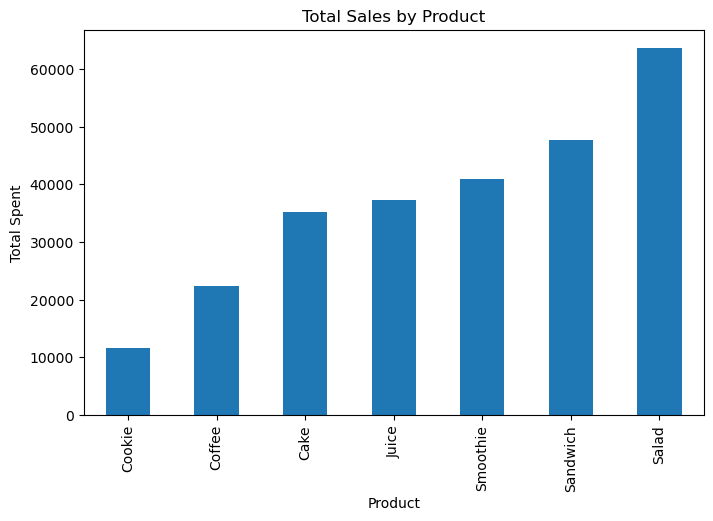

In [24]:
plt.figure(figsize=(8,5))
df.groupby('item')['total_spent'].sum().sort_values().plot(kind='bar')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Spent')
plt.show()

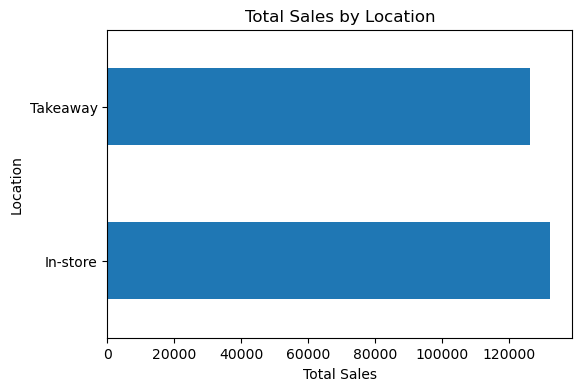

In [25]:
location_sales = df.groupby('location')['total_spent'].sum()
plt.figure(figsize=(6,4))
location_sales.plot(kind='barh')
plt.title('Total Sales by Location')
plt.xlabel('Total Sales')
plt.ylabel('Location')
plt.xticks(rotation=0)
plt.show()

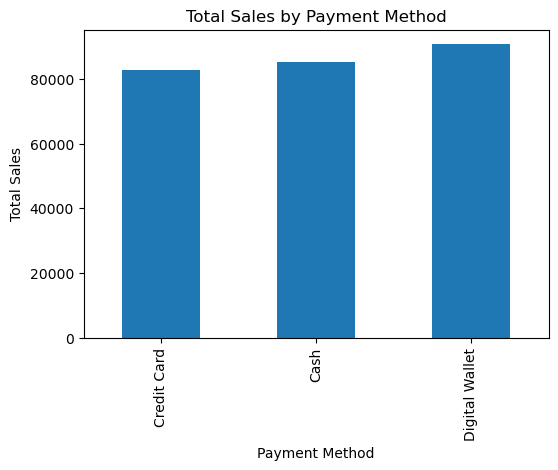

In [26]:
payment_sales = df.groupby('payment_method')['total_spent'].sum().sort_values()
plt.figure(figsize=(6,4))
payment_sales.plot(kind='bar')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()

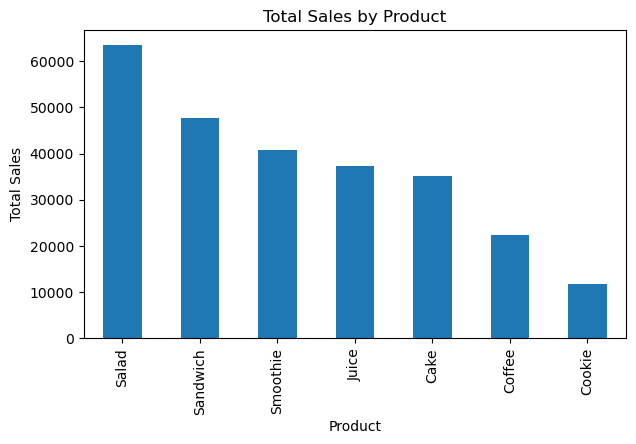

In [27]:
item_sales = df.groupby('item')['total_spent'].sum().sort_values(ascending=False)
plt.figure(figsize=(7,4))
item_sales.plot(kind='bar')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

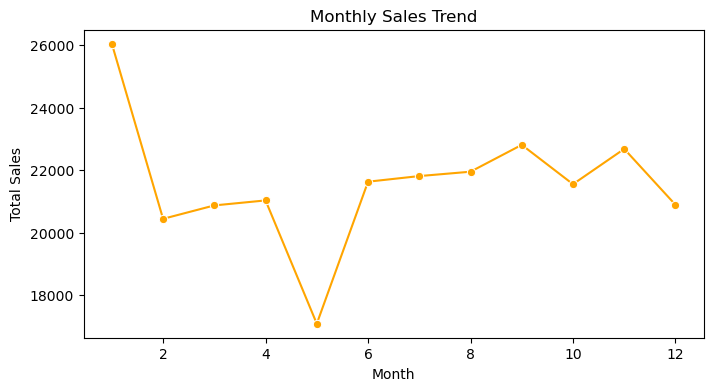

In [28]:
monthly_sales = df.groupby(['year','month'])['total_spent'].sum().reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=monthly_sales, x='month', y='total_spent', marker='o',color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

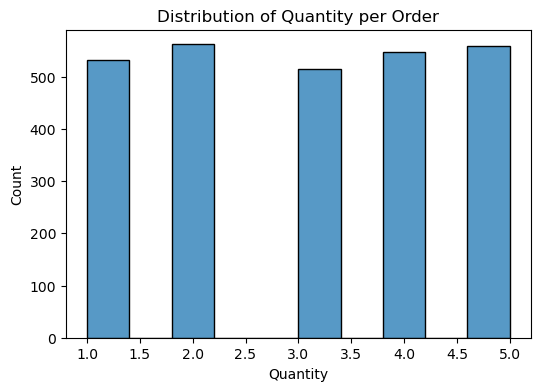

In [29]:
plt.figure(figsize=(6,4))
sns.histplot(df['quantity'], bins=10)
plt.title('Distribution of Quantity per Order')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

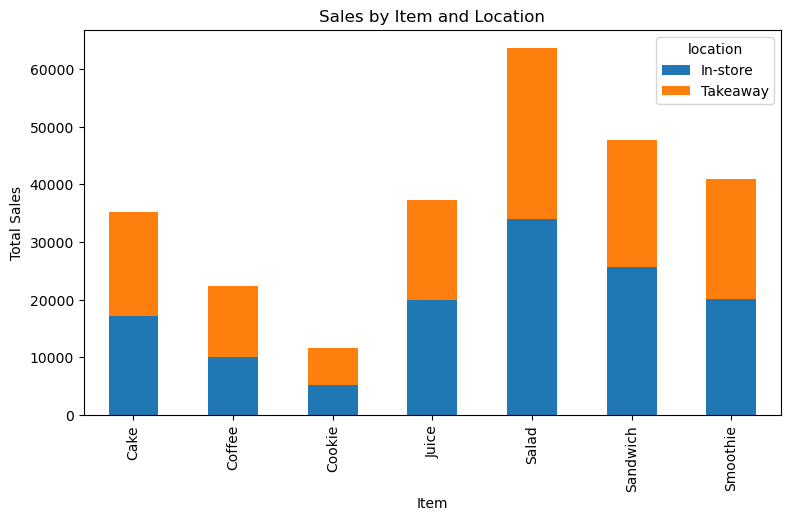

In [30]:
item_location = df.groupby(['item','location'])['total_spent'].sum().unstack()
item_location.plot(
    kind='bar',
    stacked=True,
    figsize=(9,5)
)
plt.title('Sales by Item and Location')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.show()